In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import plot_model


In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and flatten
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Input layer
input_img = Input(shape=(784,))

# Encoder: reduce dimensions
encoded = Dense(64, activation='relu')(input_img)
latent = Dense(32, activation='relu')(encoded)  # 32-dimensional latent vector

# Decoder: reconstruct input
decoded = Dense(64, activation='relu')(latent)
output_img = Dense(784, activation='sigmoid')(decoded)

# Models
autoencoder = Model(input_img, output_img)
encoder = Model(input_img, latent)  # For extracting encoded vectors


In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose=1)


Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.3606 - val_loss: 0.1760
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.1666 - val_loss: 0.1416
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.1390 - val_loss: 0.1273
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1262 - val_loss: 0.1188
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1188 - val_loss: 0.1142
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.1142 - val_loss: 0.1104
Epoch 7/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1112 - val_loss: 0.1077
Epoch 8/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1088 - val_loss: 0.1057
Epoch 9/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.1067 - val_loss: 0.1040
Epoch 10/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1048 - val_loss: 0.1024
Epoch 11/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1034 - val_loss: 0.1011
Epoch 12/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


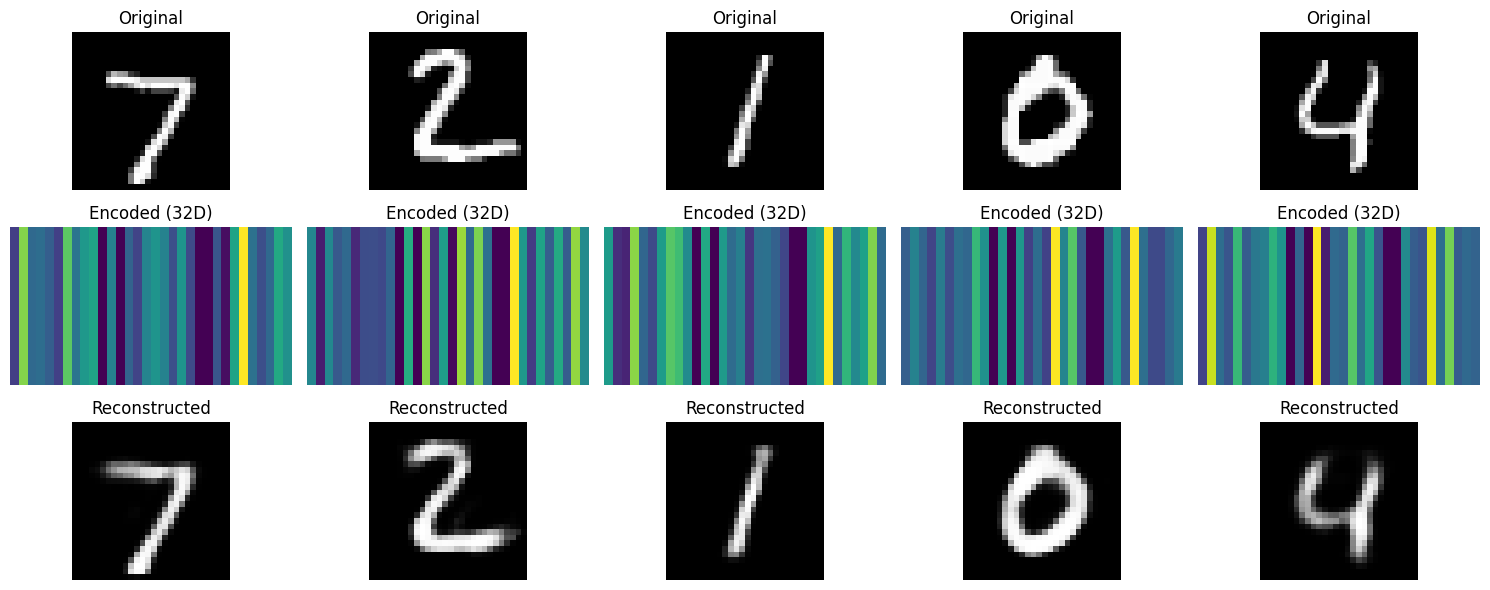

In [5]:
# Get first 5 test images
sample_imgs = x_test[:5]
encoded_imgs = encoder.predict(sample_imgs)
decoded_imgs = autoencoder.predict(sample_imgs)

plt.figure(figsize=(15, 6))
for i in range(5):
    # Original image
    plt.subplot(3, 5, i + 1)
    plt.imshow(sample_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Encoded vector heatmap
    plt.subplot(3, 5, i + 6)
    sns.heatmap(encoded_imgs[i].reshape(1, -1), cmap="viridis", cbar=False)
    plt.title("Encoded (32D)")
    plt.axis('off')

    # Reconstructed image
    plt.subplot(3, 5, i + 11)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.tight_layout()
plt.show()
